In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
...,...,...,...,...,...,...,...
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0


In [5]:
print(X)

[[  1.     1.     1.     1.   455.13 108.  ]
 [  1.     1.     1.     2.    69.17  19.  ]
 [  1.     1.     1.     3.    72.88  13.  ]
 ...
 [  5.     7.     7.     7.     2.83   1.  ]
 [  5.     7.     7.     8.    13.06   0.  ]
 [  5.     7.     7.     9.   384.87  16.  ]]


In [6]:
print(y)

[392491  46221  15694 ...    966      0 112252]


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(dataset[['Payment']])
dataset['Payment'] = imputer.transform(dataset[['Payment']])
imputer = imputer.fit(dataset[['Claims']])
dataset['Claims'] = imputer.transform(dataset[['Claims']])
dataset

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108.000000,392491.000000
1,1,1,1,2,69.17,19.000000,46221.000000
2,1,1,1,3,72.88,13.000000,15694.000000
3,1,1,1,4,1292.39,124.000000,422201.000000
4,1,1,1,5,191.01,40.000000,119373.000000
...,...,...,...,...,...,...,...
2177,5,7,7,5,8.74,62.977741,312070.495826
2178,5,7,7,6,16.61,62.977741,312070.495826
2179,5,7,7,7,2.83,1.000000,966.000000
2180,5,7,7,8,13.06,62.977741,312070.495826


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[  1.     0.     0.   ...   1.   455.13 108.  ]
 [  1.     0.     0.   ...   2.    69.17  19.  ]
 [  1.     0.     0.   ...   3.    72.88  13.  ]
 ...
 [  0.     0.     0.   ...   7.     2.83   1.  ]
 [  0.     0.     0.   ...   8.    13.06   0.  ]
 [  0.     0.     0.   ...   9.   384.87  16.  ]]


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
print(y)


[1515  881  559 ...   32    0 1208]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
print(X_train)

[[0.00000e+00 0.00000e+00 1.00000e+00 ... 3.00000e+00 9.60000e-01
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 5.23390e+02
  1.40000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 4.61800e+01
  1.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 9.30380e+02
  5.30000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.98730e+02
  5.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 2.00000e+00 1.68152e+03
  7.10000e+01]]


In [14]:
print(X_test)

[[ 0.    0.    0.   ...  5.   25.1   1.  ]
 [ 0.    0.    0.   ...  5.    0.7   0.  ]
 [ 0.    0.    0.   ...  2.    1.61  0.  ]
 ...
 [ 0.    0.    0.   ...  3.    0.2   0.  ]
 [ 1.    0.    0.   ...  3.   40.03  1.  ]
 [ 0.    0.    0.   ...  2.   31.55  3.  ]]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[-0.50536688 -0.49641572  1.96832459 ... -0.7554002  -0.17949419
  -0.24403239]
 [-0.50536688 -0.49641572 -0.50804629 ...  0.40769393 -0.09200896
  -0.17334324]
 [ 1.97876046 -0.49641572 -0.50804629 ... -0.36770216 -0.17192173
  -0.23898317]
 ...
 [-0.50536688 -0.49641572  1.96832459 ... -1.53079629 -0.02385511
   0.02357655]
 [ 1.97876046 -0.49641572 -0.50804629 ... -1.14309825 -0.12963014
  -0.21878626]
 [-0.50536688 -0.49641572  1.96832459 ... -1.14309825  0.1019295
   0.11446261]]


In [17]:
print(X_test)

[[-0.50536688 -0.49641572 -0.50804629 ...  0.01999589 -0.17545175
  -0.23898317]
 [-0.50536688 -0.49641572 -0.50804629 ...  0.01999589 -0.17953773
  -0.24403239]
 [-0.50536688 -0.49641572 -0.50804629 ... -1.14309825 -0.17938535
  -0.24403239]
 ...
 [-0.50536688 -0.49641572 -0.50804629 ... -0.7554002  -0.17962146
  -0.24403239]
 [ 1.97876046 -0.49641572 -0.50804629 ... -0.7554002  -0.1729516
  -0.23898317]
 [-0.50536688 -0.49641572 -0.50804629 ... -1.14309825 -0.17437165
  -0.22888471]]


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred=regressor.predict(X_test)

In [20]:
y_pred

array([ 676.24869082,  269.72521863,  163.67773102,  613.65776754,
        474.27755878,  646.8624064 ,  671.23717177,  318.30722328,
        922.84663546,  660.49351014,  500.6464205 ,  373.21766504,
        479.72000021,  690.75562572,  213.14758729,  432.03393816,
        603.04396623,  947.86344653,  721.70859356,  858.22499484,
        988.33830478,  517.85240357,  581.0822602 ,  392.66326719,
        934.48186639,  441.96453123,  536.69281521,  314.31974748,
       1010.61548023,  455.5916271 ,  463.14434092,  951.23830033,
        964.97435294,  686.16423745,  857.14412904,  335.81930111,
        961.04401695,  368.5504016 , 1029.67353609, 1157.98785379,
        609.29450537,  476.53162918,  879.69598479, 2819.0827019 ,
        506.90351623,  724.10503176,  922.9985177 ,  665.3808357 ,
       1294.74305525,  610.98110904,  291.1024504 ,   56.7236531 ,
       1061.26064828,  763.48635974,  868.27659304,  939.8330145 ,
       1030.5096296 ,  768.74316601,  974.04892262,  409.93081

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
lin_reg_2.coef_

array([-2.36132595e-03,  3.37845768e-03,  6.55158865e-04, ...,
        1.18836165e-09, -2.68977491e-08,  1.18714048e-07])

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_test)

array([ 676.24869082,  269.72521863,  163.67773102,  613.65776754,
        474.27755878,  646.8624064 ,  671.23717177,  318.30722328,
        922.84663546,  660.49351014,  500.6464205 ,  373.21766504,
        479.72000021,  690.75562572,  213.14758729,  432.03393816,
        603.04396623,  947.86344653,  721.70859356,  858.22499484,
        988.33830478,  517.85240357,  581.0822602 ,  392.66326719,
        934.48186639,  441.96453123,  536.69281521,  314.31974748,
       1010.61548023,  455.5916271 ,  463.14434092,  951.23830033,
        964.97435294,  686.16423745,  857.14412904,  335.81930111,
        961.04401695,  368.5504016 , 1029.67353609, 1157.98785379,
        609.29450537,  476.53162918,  879.69598479, 2819.0827019 ,
        506.90351623,  724.10503176,  922.9985177 ,  665.3808357 ,
       1294.74305525,  610.98110904,  291.1024504 ,   56.7236531 ,
       1061.26064828,  763.48635974,  868.27659304,  939.8330145 ,
       1030.5096296 ,  768.74316601,  974.04892262,  409.93081

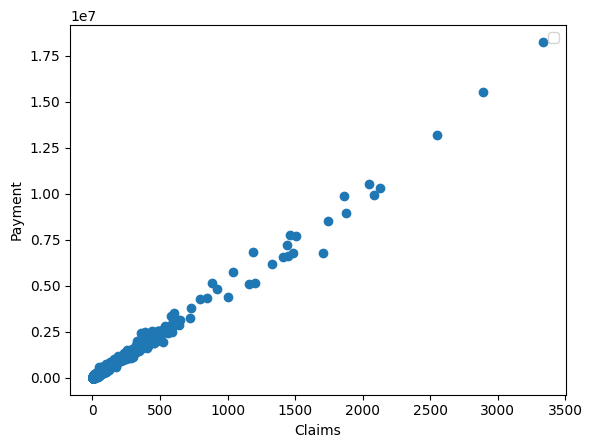

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Claims"],dataset["Payment"])
plt.xlabel('Claims')
plt.ylabel('Payment')
plt.legend()
plt.show()

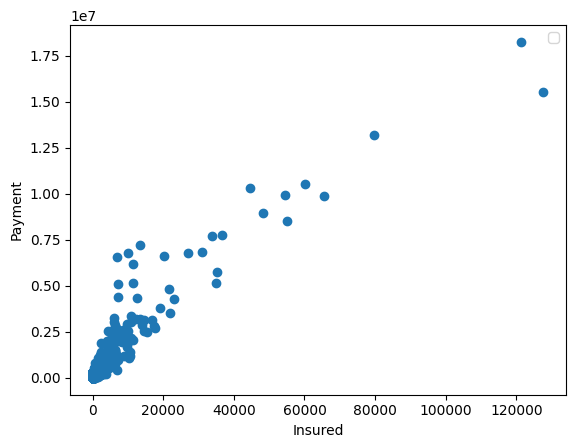

In [24]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Insured"],dataset["Payment"])
plt.xlabel('Insured')
plt.ylabel('Payment')
plt.legend()
plt.show()

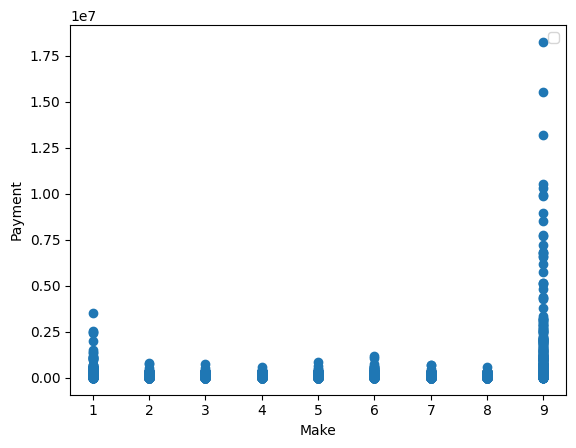

In [25]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Make"],dataset["Payment"])
plt.xlabel('Make')
plt.ylabel('Payment')
plt.legend()
plt.show()

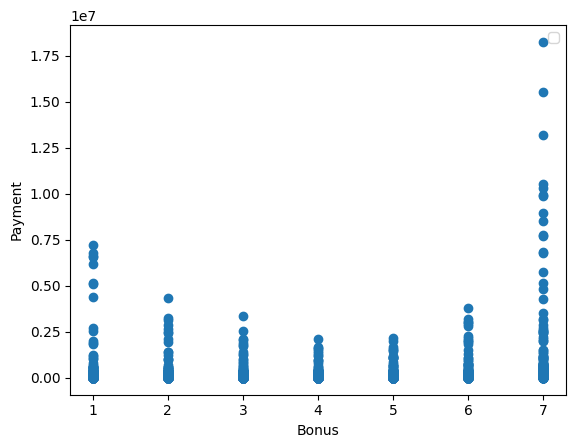

In [26]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Bonus"],dataset["Payment"])
plt.xlabel('Bonus')
plt.ylabel('Payment')
plt.legend()
plt.show()

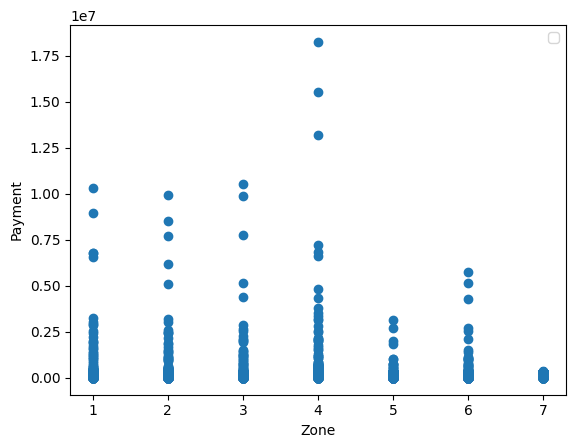

In [27]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Zone"],dataset["Payment"])
plt.xlabel('Zone')
plt.ylabel('Payment')
plt.legend()
plt.show()

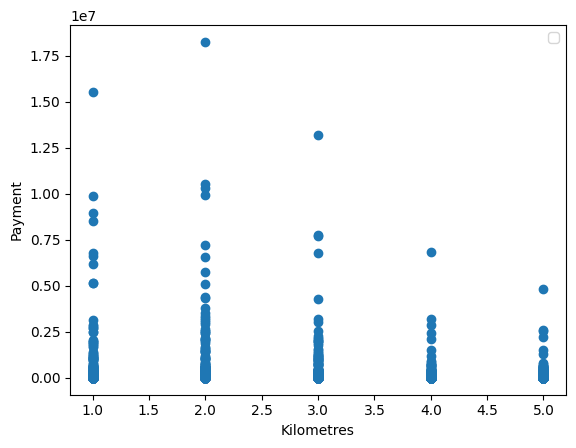

In [28]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Kilometres"],dataset["Payment"])
plt.xlabel('Kilometres')
plt.ylabel('Payment')
plt.legend()

<Axes: >

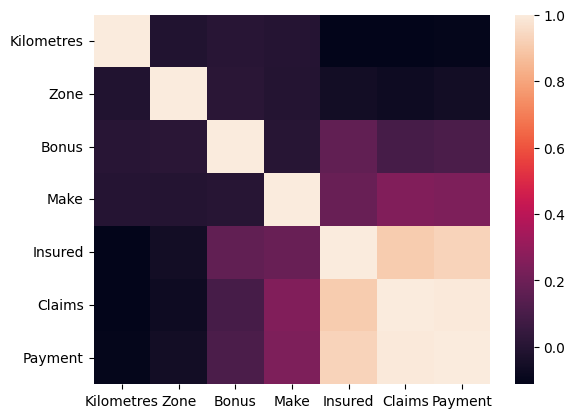

In [29]:
import seaborn as sns
sns.heatmap(dataset.corr())